In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('babies.csv')

In [3]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [5]:
print("Dataset shape:", df.shape)
print("\nMissing Values per column:\n")
print(df.isnull().sum())

Dataset shape: (1236, 8)

Missing Values per column:

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64


In [7]:
df


,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


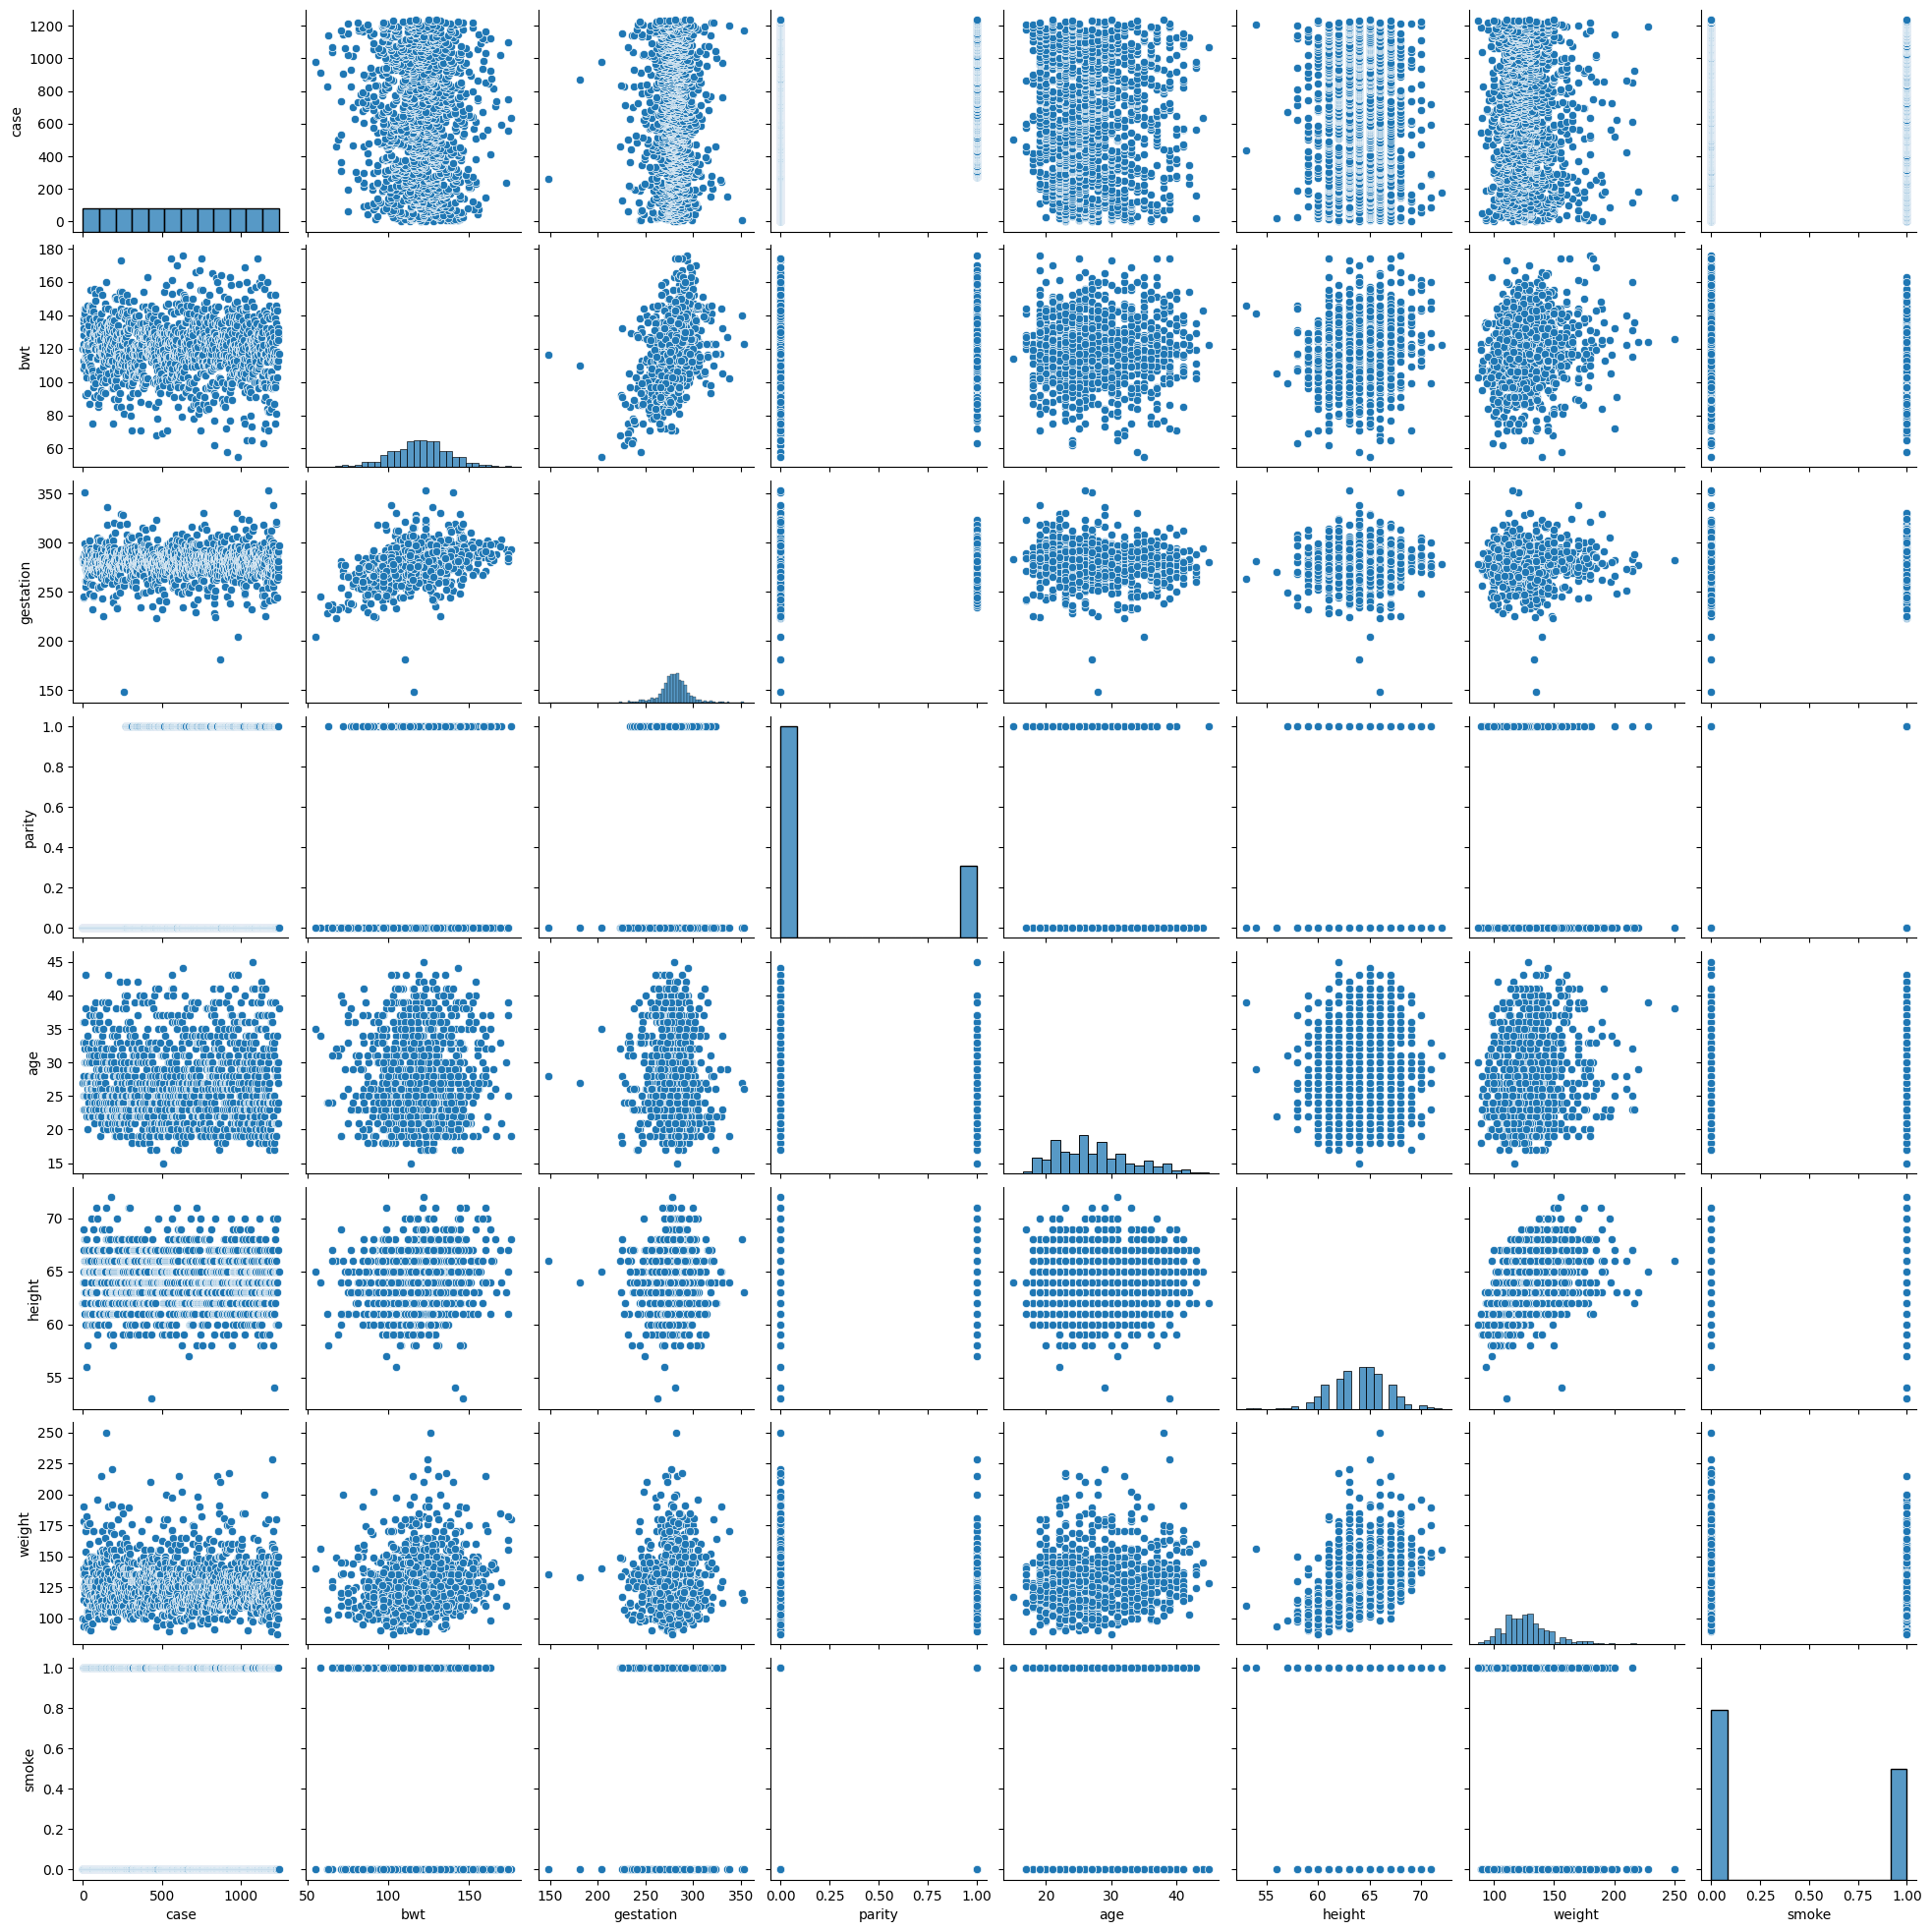

In [8]:
sns.pairplot(df)


<Axes: >

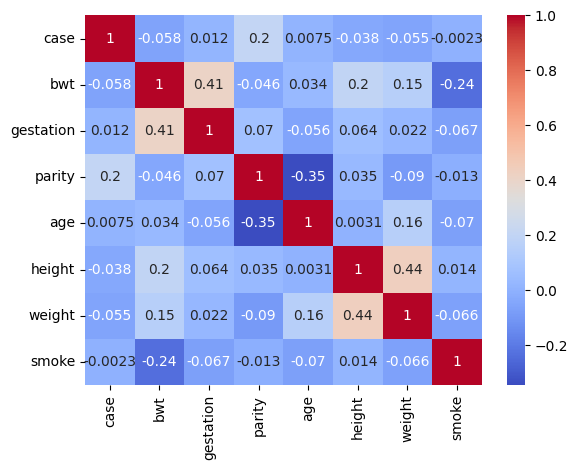

In [10]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'Birth weight distribution')

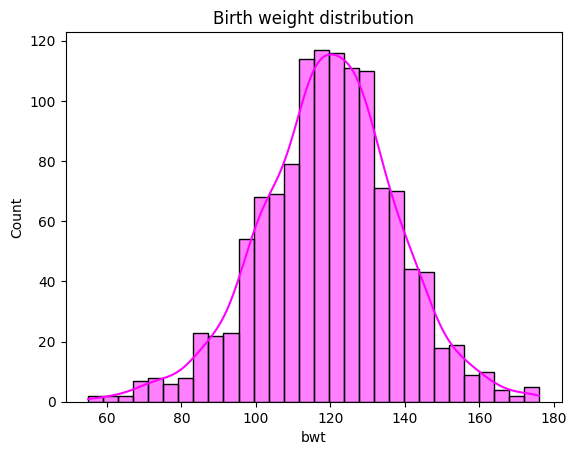

In [12]:
sns.histplot(df['bwt'], kde=True, color='magenta')
plt.title('Birth weight distribution')

In [13]:
#Influence of smoking in overall health of the baby

<Axes: xlabel='gestation', ylabel='bwt'>

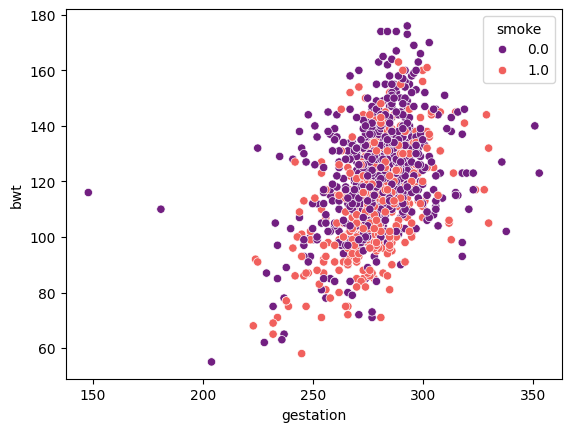

In [18]:
sns.scatterplot(data=df, x='gestation', y='bwt', hue='smoke', palette='magma')

C:\Users\Aaron\AppData\Local\Temp\ipykernel_8156\2330864647.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoke', y='bwt', palette='viridis')


Text(0.5, 1.0, 'Birth weight by smoking status')

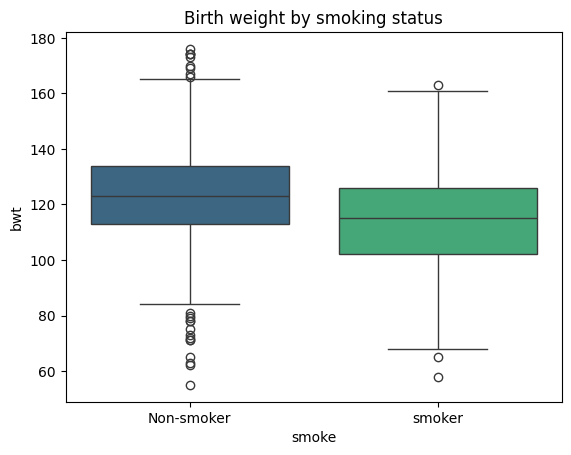

In [21]:
sns.boxplot(data=df, x='smoke', y='bwt', palette='viridis')
plt.xticks([0,1], ['Non-smoker','smoker'])
plt.title('Birth weight by smoking status')

Text(0.5, 1.0, "Mother's height vs babies weight")

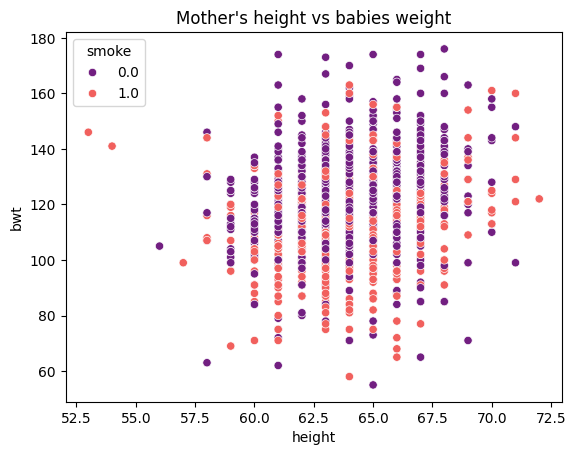

In [24]:
sns.scatterplot(data=df, x='height', y='bwt', hue='smoke', palette='magma')
plt.title("Mother's height vs babies weight")

Text(0.5, 1.0, "Mother's weight vs babies weight")

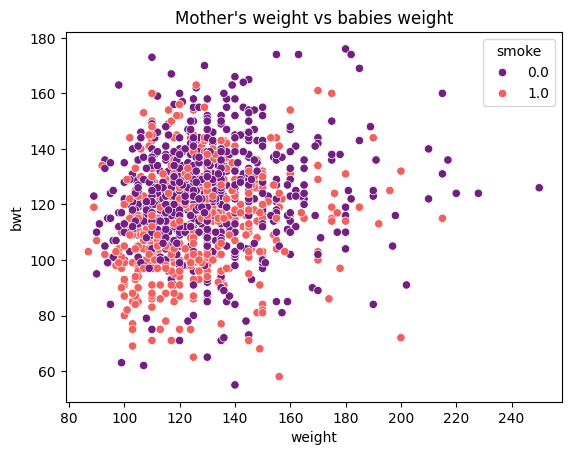

In [25]:
sns.scatterplot(data=df, x='weight', y='bwt', hue='smoke', palette='magma')
plt.title("Mother's weight vs babies weight")

<Axes: xlabel='gestation', ylabel='bwt'>

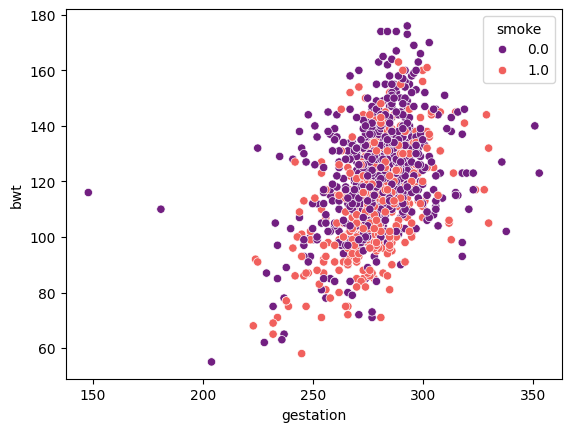

In [26]:
sns.scatterplot(data=df, x='gestation', y='bwt', hue='smoke', palette='magma')

C:\Users\Aaron\AppData\Local\Temp\ipykernel_8156\1378795609.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='smoke', y='gestation', palette='magma')


Text(0.5, 1.0, 'Gestation time by smoking status')

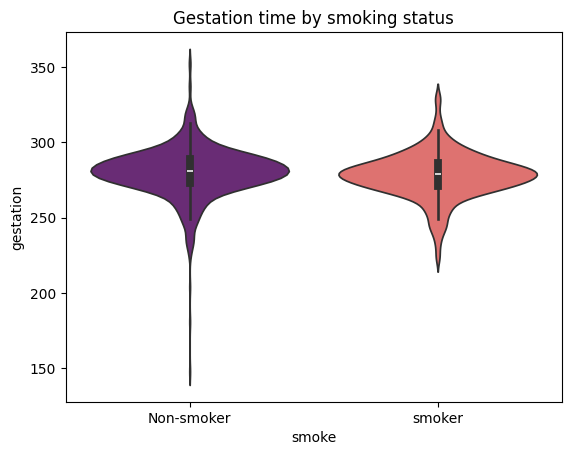

In [29]:
sns.violinplot(data=df, x='smoke', y='gestation', palette='magma')
plt.xticks([0,1], ['Non-smoker','smoker'])
plt.title('Gestation time by smoking status')

In [31]:
mean_gestation_non_smokers = df[df['smoke'] == 0]['gestation'].mean()
mean_gestation_smokers = df[df['smoke'] == 1]['gestation'].mean()

# Print results
print(f"Mean gestation (non-smokers): {mean_gestation_non_smokers:.2f}")
print(f"Mean gestation (smokers): {mean_gestation_smokers:.2f}")

Mean gestation (non-smokers): 280.19
Mean gestation (smokers): 277.98
